In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='******',
                        host='127.0.01',
                        port='5432',
                        database='tensor_factorisation_wordnet')

In [3]:
entity = psql.read_sql("SELECT * FROM entity", connection)
entity.head()

,synset_id,name,sense_index
0,85227,city,1.0
1,85228,jurisprudence,2.0
2,85229,bird_genus,1.0
3,85230,individual,1.0
4,85231,armed_forces,1.0


In [4]:
entity.count()

synset_id      38696
name           38696
sense_index    38694
dtype: int64

In [5]:
entity_counts = entity.count().to_frame()
entity_counts.head()

,0
synset_id,38696
name,38696
sense_index,38694


In [6]:
entity_counts = entity_counts.reset_index()
entity_counts.head()

,index,0
0,synset_id,38696
1,name,38696
2,sense_index,38694


In [7]:
entity_counts = entity_counts.rename(columns={'index': 'label', 0: 'value'})
entity_counts.head()

,label,value
0,synset_id,38696
1,name,38696
2,sense_index,38694


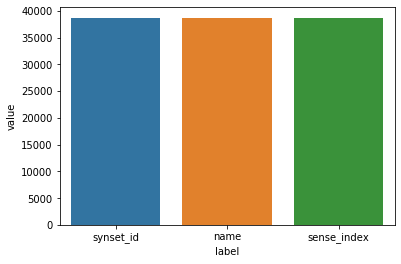

In [8]:
ax = sns.barplot(x="label", y="value", data=entity_counts)

In [9]:
relation = psql.read_sql("SELECT * FROM relation", connection)
relation.head()

,id,name
0,1,hasinstance
1,2,typeof
2,3,membermeronym
3,4,memberholonym
4,5,partof


In [10]:
relation_counts = relation.count().to_frame()
relation_counts.head()

,0
id,11
name,11


In [11]:
relation_counts = relation_counts.reset_index()
relation_counts.head()

,index,0
0,id,11
1,name,11


In [12]:
relation_counts = relation_counts.rename(columns={'index': 'label', 0: 'value'})
relation_counts.head()

,label,value
0,id,11
1,name,11


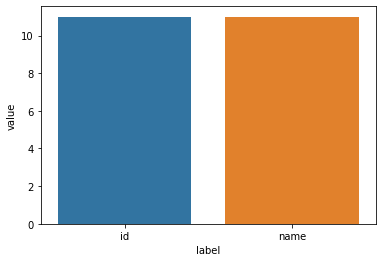

In [13]:
ax = sns.barplot(x="label", y="value", data=relation_counts)

In [14]:
triple = psql.read_sql("SELECT * FROM train UNION SELECT * FROM valid UNION SELECT * FROM test", connection)
triple.head()

,id,subject,subject_sense_index,predicate,object,object_sense_index
0,1,chamaecyparis_lawsoniana,1.0,type of,cedar,1.0
1,1,genus_xylomelum,1.0,type of,dicot_genus,1.0
2,1,spiritual_bouquet,1.0,type of,sympathy_card,1.0
3,2,chamaecyparis_lawsoniana,1.0,type of,order_synentognathi,1.0
4,2,genus_xylomelum,1.0,type of,clostridium_perfringens,1.0


In [15]:
triple_counts = triple.count().to_frame()
triple_counts.head()

,0
id,136611
subject,136611
subject_sense_index,136608
predicate,136611
object,136611


In [16]:
triple_counts = triple_counts.reset_index()
triple_counts.head()

,index,0
0,id,136611
1,subject,136611
2,subject_sense_index,136608
3,predicate,136611
4,object,136611


In [17]:
triple_counts = triple_counts.rename(columns={'index': 'label', 0: 'value'})
triple_counts.head()

,label,value
0,id,136611
1,subject,136611
2,subject_sense_index,136608
3,predicate,136611
4,object,136611


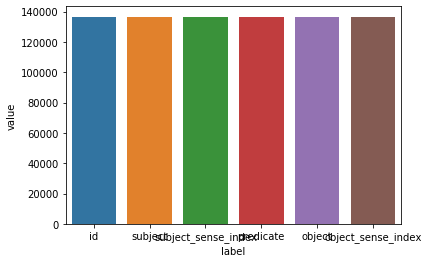

In [18]:
ax = sns.barplot(x="label", y="value", data=triple_counts)

In [19]:
triple_entity_relation_counts = pd.DataFrame([triple_counts.loc[0, 'value'], 
                                              entity_counts.loc[0, 'value'], 
                                              relation_counts.loc[0, 'value']], index=['triple', 'entity', 'relation'])
triple_entity_relation_counts.head()

,0
triple,136611
entity,38696
relation,11


In [20]:
triple_entity_relation_counts = triple_entity_relation_counts.reset_index()
triple_entity_relation_counts.head()

,index,0
0,triple,136611
1,entity,38696
2,relation,11


In [21]:
triple_entity_relation_counts = triple_entity_relation_counts.rename(columns={'index': 'label', 0: 'value'})
triple_entity_relation_counts.head()

,label,value
0,triple,136611
1,entity,38696
2,relation,11


In [22]:
tmp = triple_entity_relation_counts.iloc[0]
triple_entity_relation_counts.iloc[0] = triple_entity_relation_counts.iloc[1]
triple_entity_relation_counts.iloc[1] = triple_entity_relation_counts.iloc[2]
triple_entity_relation_counts.iloc[2] = tmp
triple_entity_relation_counts

,label,value
0,entity,38696
1,relation,11
2,triple,136611


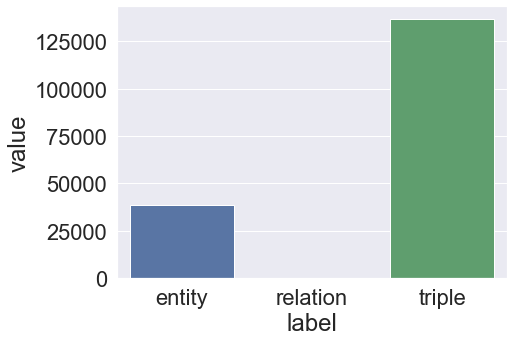

In [23]:
plt.figure(figsize=(7, 5))
sns.set(font_scale=2) 
ax = sns.barplot(x="label", y="value", data=triple_entity_relation_counts)
plt.savefig('Wordnet_Counts.png', bbox_inches = "tight", format='PNG')

In [24]:
fact = psql.read_sql("SELECT * FROM fact_train UNION SELECT * FROM fact_valid UNION SELECT * FROM fact_test", connection)
fact.head()

,id,subject,s_name,predicate,object,o_name
0,1,96845.0,genus_xylomelum,type of,85242.0,dicot_genus
1,1,100673.0,chamaecyparis_lawsoniana,type of,86577.0,cedar
2,1,115525.0,spiritual_bouquet,type of,103855.0,sympathy_card
3,2,96845.0,genus_xylomelum,type of,101266.0,clostridium_perfringens
4,2,100673.0,chamaecyparis_lawsoniana,type of,88902.0,order_synentognathi


In [25]:
fact = fact.set_index('id')
fact.head()

,subject,s_name,predicate,object,o_name
id,,,,,
1,96845.0,genus_xylomelum,type of,85242.0,dicot_genus
1,100673.0,chamaecyparis_lawsoniana,type of,86577.0,cedar
1,115525.0,spiritual_bouquet,type of,103855.0,sympathy_card
2,96845.0,genus_xylomelum,type of,101266.0,clostridium_perfringens
2,100673.0,chamaecyparis_lawsoniana,type of,88902.0,order_synentognathi


In [26]:
predicate_counts = fact['predicate'].value_counts(dropna=False)
predicate_counts.head(50)

has instance               43312
type of                    36659
member holonym             11925
member meronym             11834
part of                     8123
has part                    7705
domain region               4970
synset domain topic         4722
subordinate instance of     4522
similar to                  1610
domain topic                1229
Name: predicate, dtype: int64

In [27]:
predicate_counts.index

Index(['has instance', 'type of', 'member holonym', 'member meronym',
       'part of', 'has part', 'domain region', 'synset domain topic',
       'subordinate instance of', 'similar to', 'domain topic'],
      dtype='object')

In [28]:
predicate_counts = predicate_counts.reset_index()
predicate_counts.head(50)

,index,predicate
0,has instance,43312
1,type of,36659
2,member holonym,11925
3,member meronym,11834
4,part of,8123
5,has part,7705
6,domain region,4970
7,synset domain topic,4722
8,subordinate instance of,4522
9,similar to,1610


In [29]:
predicate_counts = predicate_counts.rename(columns={'index': 'label', 'predicate': 'value'})
predicate_counts.head()

,label,value
0,has instance,43312
1,type of,36659
2,member holonym,11925
3,member meronym,11834
4,part of,8123


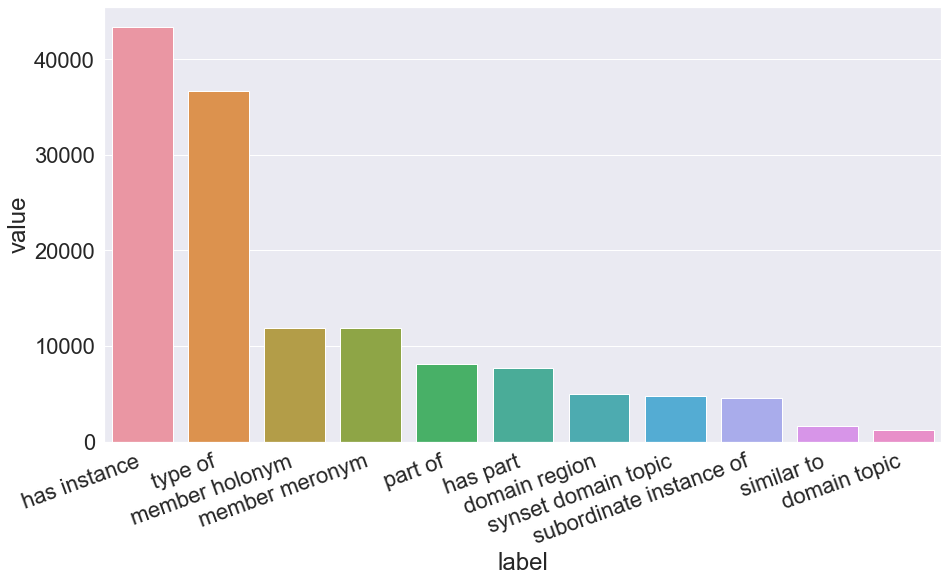

In [30]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
ax = sns.barplot(x="label", y="value", data=predicate_counts[:50])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.savefig('Wordnet_Predicate_Counts.png', bbox_inches = "tight", format='PNG')

In [31]:
predicate_counts.count(), predicate_counts.max(), predicate_counts.min(), predicate_counts.median()

(label    11
 value    11
 dtype: int64, label    type of
 value      43312
 dtype: object, label    domain region
 value             1229
 dtype: object, value    7705.0
 dtype: float64)

In [33]:
# Computing IQR
Q1 = predicate_counts.quantile(0.25)
Q3 = predicate_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    7257.5
dtype: float64

In [34]:
object_counts = fact['o_name'].value_counts(dropna=False).to_frame()
object_counts.head(50)

,o_name
city,537
jurisprudence,466
bird_genus,341
armed_forces,332
herb,321
mammal_genus,309
bush,286
asterid_dicot_genus,278
fish_genus,247
rosid_dicot_genus,243


In [35]:
object_counts.index

Index(['city', 'jurisprudence', 'bird_genus', 'armed_forces', 'herb',
       'mammal_genus', 'bush', 'asterid_dicot_genus', 'fish_genus',
       'rosid_dicot_genus',
       ...
       'unoriginality', 'mescaline', 'initiator', 'genus_streptosolen',
       'clarification', 'atomic_number_64', 'imperceptible', 'islamise',
       'unfree', 'bar_absolute'],
      dtype='object', length=33011)

In [36]:
object_counts = object_counts.reset_index()
object_counts.head()

,index,o_name
0,city,537
1,jurisprudence,466
2,bird_genus,341
3,armed_forces,332
4,herb,321


In [37]:
object_counts = object_counts.rename(columns={'index': 'label', 'o_name': 'value'})
object_counts.head()

,label,value
0,city,537
1,jurisprudence,466
2,bird_genus,341
3,armed_forces,332
4,herb,321


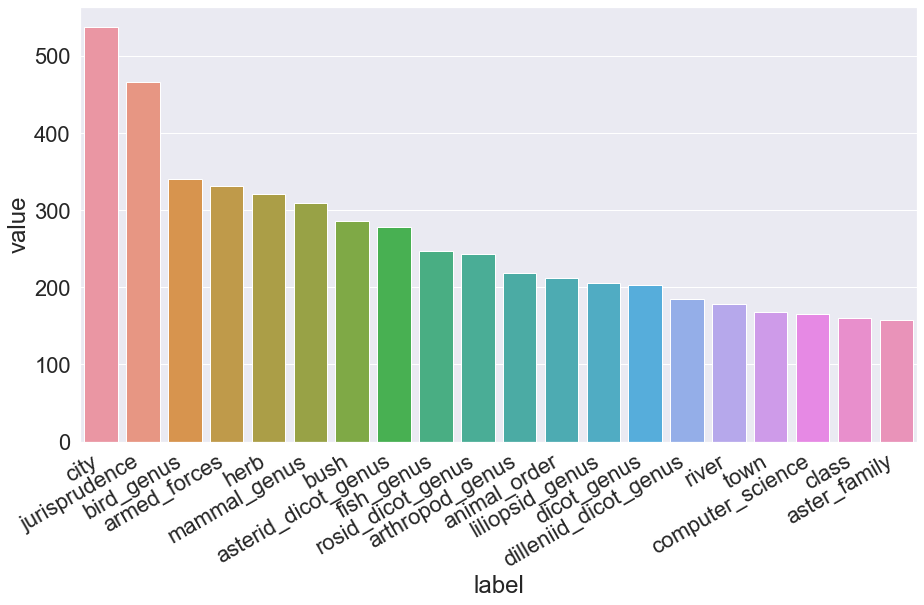

In [49]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
ax = sns.barplot(x="label", y="value", data=object_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('Wordnet_Object_Counts.png', bbox_inches = "tight", format='PNG')

In [47]:
object_counts.count(), object_counts.max(), object_counts.min(), object_counts.median()

(label    33011
 value    33011
 dtype: int64, label    zymosis
 value        537
 dtype: object, label    0.0
 value    1.0
 dtype: float64, value    3.0
 dtype: float64)

In [48]:
# Computing IQR
Q1 = object_counts.quantile(0.25)
Q3 = object_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    2.0
dtype: float64

In [39]:
subject_counts = fact['s_name'].value_counts().to_frame()
subject_counts.head()

,s_name
city,619
jurisprudence,505
britain,500
bird_genus,425
armed_forces,374


In [40]:
subject_counts.index

Index(['city', 'jurisprudence', 'britain', 'bird_genus', 'armed_forces',
       'mammal_genus', 'herb', 'asterid_dicot_genus', 'rosid_dicot_genus',
       'fish_genus',
       ...
       'bulldog', 'year_dot', 'batik', 'iambic', 'great_australian_bight',
       'stringer', 'modern_dance', 'inessential', 'cloven_foot', 'braille'],
      dtype='object', length=32720)

In [41]:
subject_counts = subject_counts.reset_index()
subject_counts.head()

,index,s_name
0,city,619
1,jurisprudence,505
2,britain,500
3,bird_genus,425
4,armed_forces,374


In [42]:
subject_counts = subject_counts.rename(columns={'index': 'label', 's_name': 'value'})
subject_counts.head()

,label,value
0,city,619
1,jurisprudence,505
2,britain,500
3,bird_genus,425
4,armed_forces,374


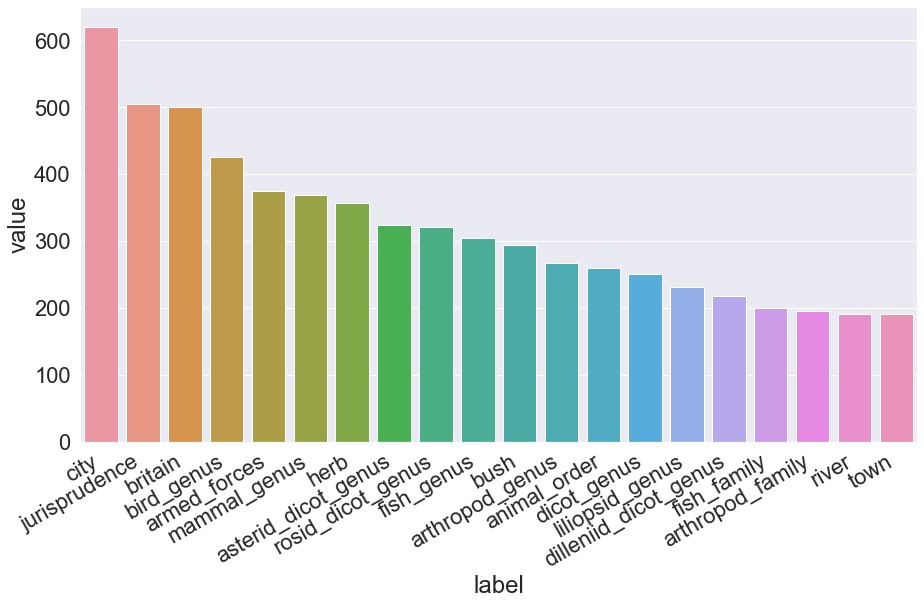

In [43]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
ax = sns.barplot(x="label", y="value", data=subject_counts[:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.savefig('Wordnet_Subject_Counts.png', bbox_inches = "tight", format='PNG')

In [44]:
subject_counts.count(), subject_counts.max(), subject_counts.min(), subject_counts.median()

(label    32720
 value    32720
 dtype: int64, label    zymosis
 value        619
 dtype: object, label    0.0
 value    1.0
 dtype: float64, value    2.0
 dtype: float64)

In [45]:
# Computing IQR
Q1 = subject_counts.quantile(0.25)
Q3 = subject_counts.quantile(0.75)
IQR = Q3 - Q1
IQR

value    2.0
dtype: float64